### Package Imports:

* import core pydata stack (pandas, seaborn matplotlib, numpy)
* import the normal distribution object from scipy, I'll need this for plotting
* import warnings to block future warnings.  I am doing this because there are currently a lot of these thrown because of bad coordination between scipy and seaborn.  This will hopefully be fixed with time.

In [87]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import norm
import warnings 
warnings.filterwarnings(action='ignore', category=FutureWarning)
df = pd.read_csv('responses.csv')
categorical = df.dtypes[df.dtypes == 'object'].index
numeric = df.dtypes[df.dtypes.isin(['float64', 'int64'])]
#https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/bmiage/page5_1.html
df['BMI'] = (df['Weight']/ df['Height'] / df['Height']) * 10000
df = df.drop(['Height', 'Weight'], 1)

df['Outcome'] = [1 if i > 3 else 0 for i in df['Healthy eating']]
df.drop(['Healthy eating'], 1, inplace = True)

Define a number of plotting functions to use visualize model parameters / feature importances

### Functions:

In [88]:
def treeimp_df(model, X):
    coefs = pd.DataFrame({'name': X.columns, 'coef' : model.feature_importances_})
    coefs = coefs.sort_values('coef', ascending = False)
    return(coefs)


def treeimp_plot(model, X, n = 50, figsize = (12, 8)):
    coefs = treeimp_df(model, X)
    plt.figure(figsize = figsize)
    sns.pointplot(y="name", x="coef",
                  data=coefs.head(n), ci=None, color = 'C0')
    sns.barplot(y = "name", x= "coef", data=coefs.head(50), ci=None, color = 'C0', alpha = 0.2)
    plt.title('Variable Importance Plot')
    plt.tight_layout()
    
def norm_plot(x, figsize = (12, 8)):
    mean, sd = norm.fit(x.dropna())
    fig, ax = plt.subplots(figsize= figsize)
    sns.distplot(x.dropna(), label = 'Emperical Fit', ax = ax)
    sns.distplot(x.dropna(), fit = norm, hist=False, label = 'Gausssian Fit\nmean = {}, sd = {}'.format(round(mean, 2), round(sd, 2)),
             kde = False, ax = ax)
    ax.legend()    
    return(ax)

def coef_plot(model, X, abs_ = False):
    if abs_ == False:
        coefs = pd.DataFrame({'name': X.columns, 'coef' : model.coef_[0]}).sort_values('coef')
        coefs = coefs[abs(coefs['coef']) > 0]
    else:
        coefs = pd.DataFrame({'name': X.columns, 'coef' : np.abs(model.coef_[0])}).sort_values('coef')
        coefs = coefs.query("coef > 0")
    plt.figure(figsize = (14, 20))
    sns.pointplot(y="name", x="coef",
                  data=coefs, ci=None, color = 'C0')
    sns.barplot(y = "name", x= "coef", data=coefs, ci=None, color = 'C0', alpha = 0.2)
    plt.title('Coeficient Plot')
    plt.tight_layout()

Numeric column summary stats:

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Music,1007.0,4.731877,0.664049,1.000000,5.000000,5.00000,5.000000,5.000000
Slow songs or fast songs,1008.0,3.328373,0.833931,1.000000,3.000000,3.00000,4.000000,5.000000
Dance,1006.0,3.113320,1.170568,1.000000,2.000000,3.00000,4.000000,5.000000
Folk,1005.0,2.288557,1.138916,1.000000,1.000000,2.00000,3.000000,5.000000
Country,1005.0,2.123383,1.076136,1.000000,1.000000,2.00000,3.000000,5.000000
Classical music,1003.0,2.956132,1.252570,1.000000,2.000000,3.00000,4.000000,5.000000
Musical,1008.0,2.761905,1.260845,1.000000,2.000000,3.00000,4.000000,5.000000
Pop,1007.0,3.471698,1.161400,1.000000,3.000000,4.00000,4.000000,5.000000
Rock,1004.0,3.761952,1.184861,1.000000,3.000000,4.00000,5.000000,5.000000
Metal or Hardrock,1007.0,2.361470,1.372995,1.000000,1.000000,2.00000,3.000000,5.000000


* Large number of numeric columns
* Most on 1 - 5 likert scale
* Mean typically around 3, std typically around 1

There are a few numeric variables that are more continuous in nature:

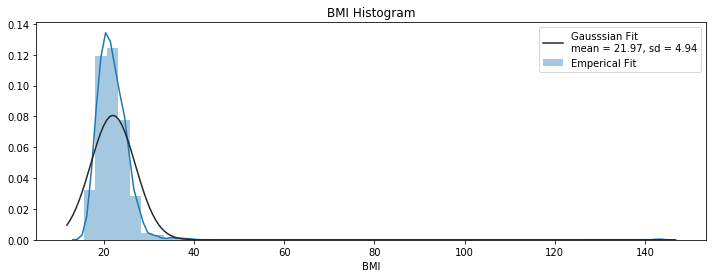

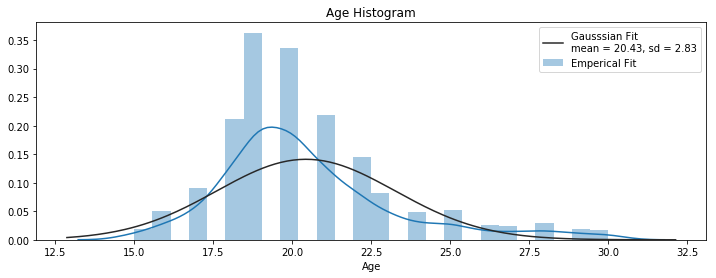

In [90]:
for i in ['BMI', 'Age']:
    norm_plot(df[i], figsize = (12, 4))
    plt.title(i + " Histogram")
    plt.show()

In [91]:
print(len(df.select_dtypes('object').describe().T), "object type columns")
print(df.select_dtypes('object').describe().T)

11 object type columns
                       count unique                  top freq
Smoking                 1002      4        tried smoking  430
Alcohol                 1005      3       social drinker  659
Punctuality             1008      3  i am always on time  399
Lying                   1008      4            sometimes  549
Internet usage          1010      4      few hours a day  744
Gender                  1004      2               female  593
Left - right handed     1007      2         right handed  906
Education               1009      6     secondary school  621
Only child              1008      2                   no  754
Village - town          1006      2                 city  707
House - block of flats  1006      2       block of flats  595


* 11 categorical columns 
* Most people in the dataset have tried smoking, this is a bit suprising
* It's worth noting that most people interviewed were from the city

In [92]:
rows, cols = df.shape
print("there are {} columns and {} rows".format(cols, rows))

there are 149 columns and 1010 rows


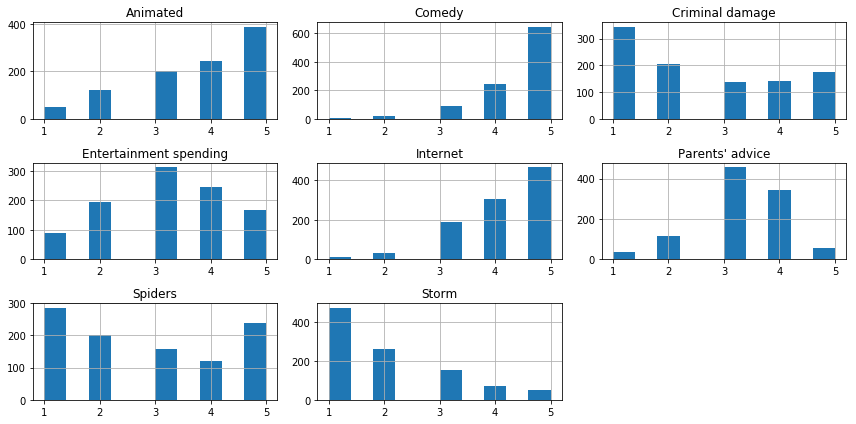

In [93]:
colnames = df.columns
rand = np.random.choice(colnames, 10, replace = False)
df[rand].hist(figsize = (12, 6))
plt.tight_layout()
plt.show()

In [94]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df = pd.get_dummies(df)
X = df.drop(['Outcome'], 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y)


pipe = Pipeline([('imp', SimpleImputer(strategy = 'most_frequent')),
                 ('scale', MinMaxScaler()),
                ('rf', GradientBoostingClassifier())
            ])
pipe.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe, X = X_train, y = y_train, cv = 10, n_jobs = -1)
_ = [print(score) for score in scores]
print("Mean = {}, sd = {}".format(np.mean(scores), np.std(scores)))

0.75
0.7236842105263158
0.7105263157894737
0.7368421052631579
0.7236842105263158
0.7105263157894737
0.7105263157894737
0.6710526315789473
0.7466666666666667
0.7027027027027027
Mean = 0.7186211474632527, sd = 0.02206172146213792


In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error

pipe = Pipeline([('imp', SimpleImputer(strategy = 'most_frequent')),
                 ('scale', MinMaxScaler()),
                ('gbm', GradientBoostingClassifier())
            ])

pipe.fit(X, y)
params_gbm = {'gbm__n_estimators' : [100, 350, 500, 1000, 2000, 3000],
            'gbm__max_features': ['log2', 'auto', 'sqrt'],
            'gbm__min_samples_leaf': [1, 2, 10, 30],
            "gbm__min_samples_split": [2, 3,5,7,9,11],
            "gbm__learning_rate" : [1e-5,1e-4, 1e-3, 1e-2, 0.1, 1]}
# Import GridSearchCV

# Instantiate grid_rf
grid_rf = RandomizedSearchCV(estimator=pipe,
                       param_distributions=params_gbm,
                       cv=5,
                       verbose=0,
                       n_jobs=-1, 
                       n_iter = 15)

grid_rf.fit(X,y)
bestmodel = grid_rf.best_estimator_
print(grid_rf.best_score_)

0.7188118811881188


In [116]:
from xgboost.sklearn import XGBClassifier 
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "xgb__n_estimators": st.randint(100, 500),
    "xgb__max_depth": st.randint(2, 40),
    "xgb__learning_rate": st.uniform(0.001, 0.4),
    "xgb__colsample_bytree": one_to_left,
    "xgb__subsample": one_to_left,
    "xgb__gamma": from_zero_positive,
    'xgb__reg_alpha': from_zero_positive,
    "xgb__min_child_weight": from_zero_positive,
}

 


pipe = Pipeline([('imp', SimpleImputer(strategy = 'most_frequent')),
                ('xgb', XGBClassifier(nthreads=-1))
            ])

pipe.fit(X_train, y_train)

grid_gbm = RandomizedSearchCV(estimator=pipe,
                       param_distributions=params,
                       cv=5,
                       verbose=0,
                       n_jobs=-1, 
                       n_iter = 10)

grid_gbm =grid_gbm.fit(X_train,y_train)

In [118]:
pipe.score(X_test, y_test)

0.7154150197628458

In [113]:
print('Not beating the no information rate by much')
1 - round(np.mean(y_train), 4)

Not beating the no information rate by much


0.712

In [107]:
print(grid_rf.score(X_test, y_test))

0.7905138339920948


In [48]:
print('Performance on test set better')
print('Could be due to regularization or sample size')
1 - round(np.mean(y_test), 4)

Performance on test set better
Could be due to regularization or sample size


0.6877

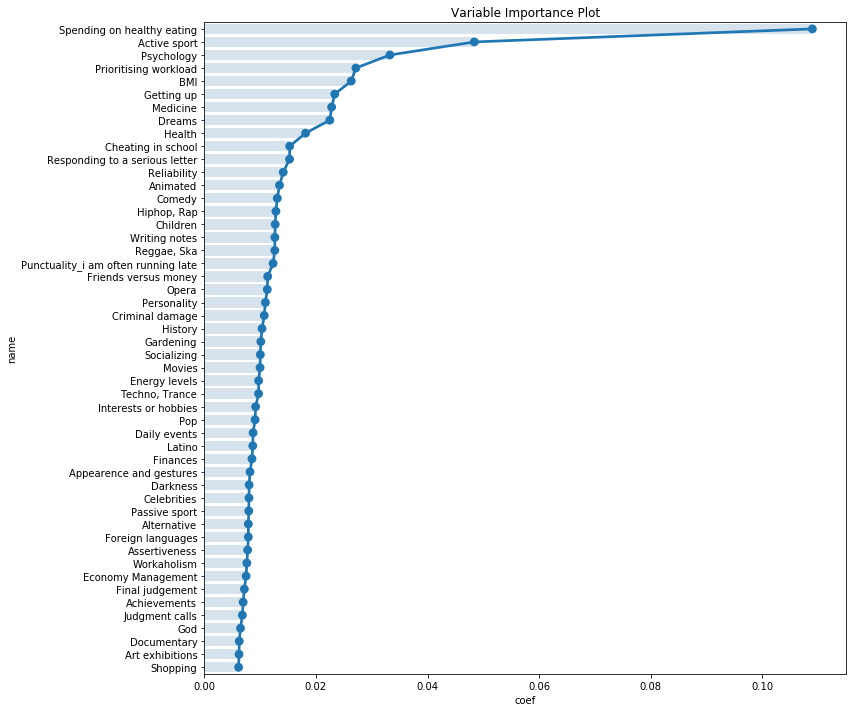

In [49]:
tree = pipe.named_steps['gbm']
treeimp_plot(tree, X, figsize=(12, 10))

In [51]:
from sklearn.linear_model import LogisticRegressionCV

pipe = Pipeline([('imp', SimpleImputer(strategy = 'most_frequent')),
                 ('scaler', StandardScaler()),
                ('glm', LogisticRegressionCV(solver = 'liblinear', scoring = 'roc_auc'))
            ])
pipe.fit(X_train, y_train)


glm = pipe.named_steps['glm']
pipe.score(X_test, y_test)

/anaconda3/envs/Main/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.6947475629273969

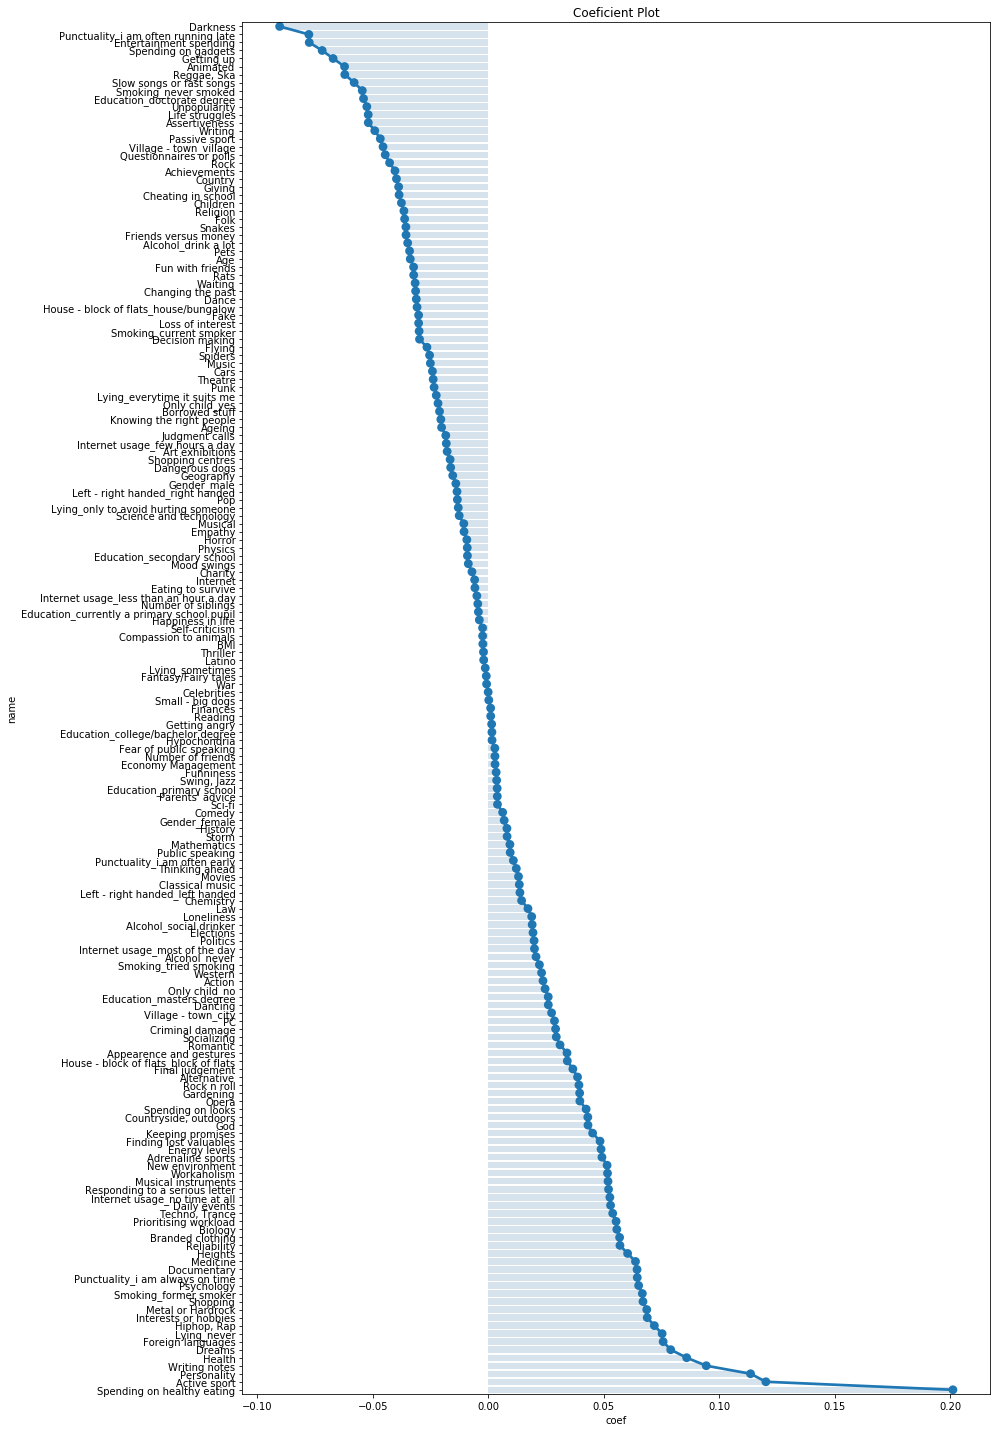

In [53]:
coef_plot(glm, X)

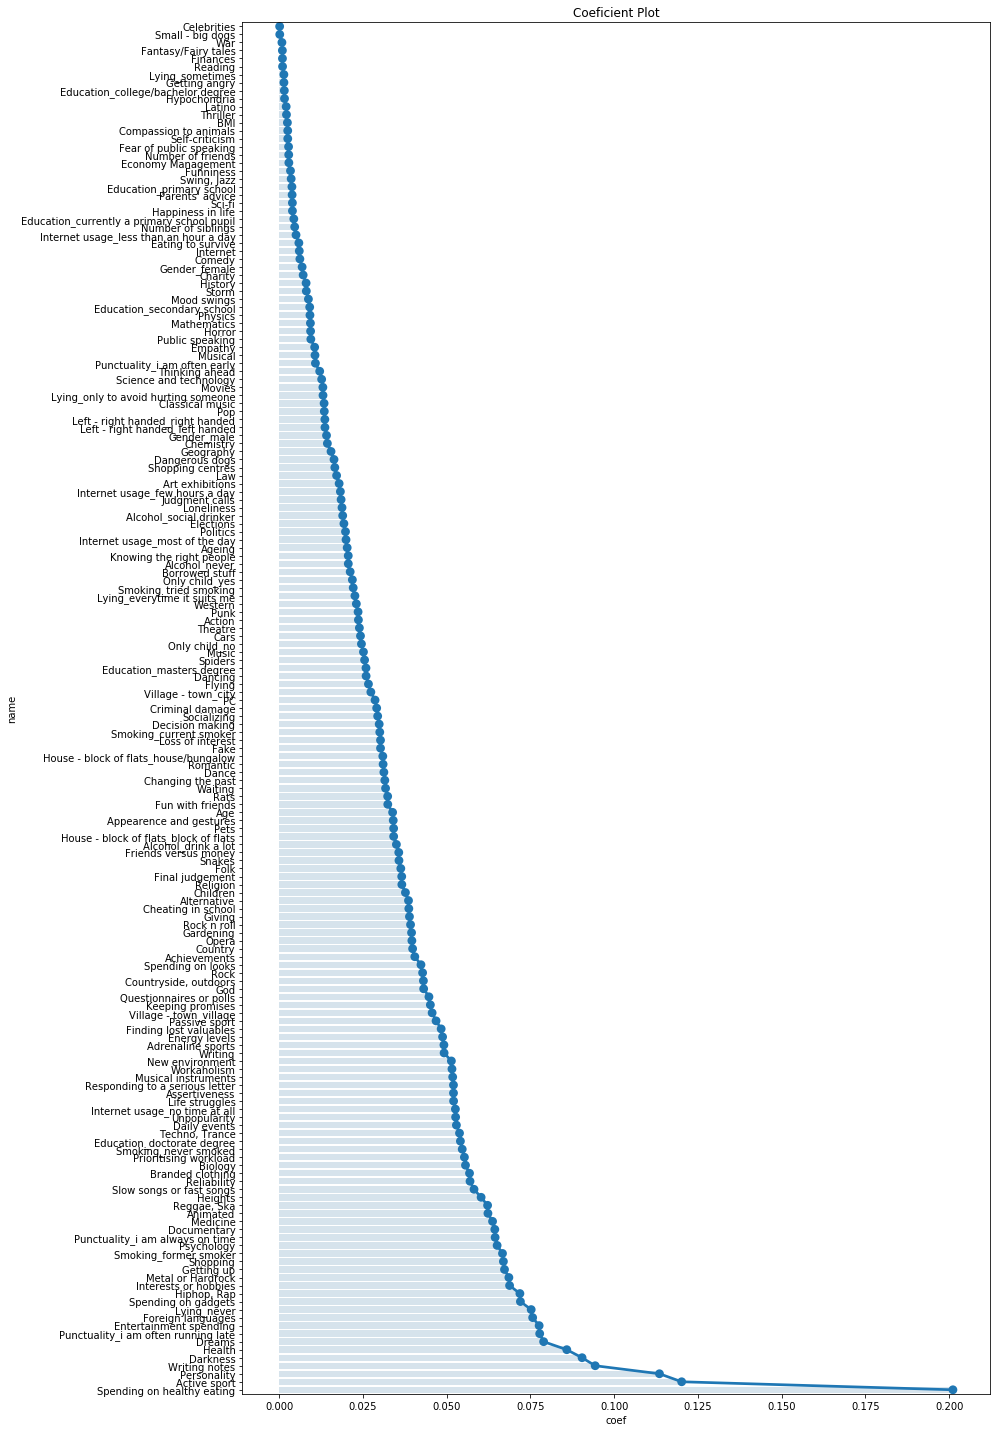

In [54]:
coef_plot(glm, X, abs_ = True)

In [62]:
from sklearn.linear_model import LogisticRegressionCV



pipe = Pipeline([('imp', SimpleImputer(strategy = 'most_frequent')),
                 ('scaler', RobustScaler()),
                ('glm', LogisticRegressionCV(solver = 'liblinear', scoring = 'roc_auc', penalty = 'l1'))
            ])
pipe.fit(X_train, y_train)


glm = pipe.named_steps['glm']
pipe.score(X_test, y_test)

/anaconda3/envs/Main/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1926: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.7298325722983258

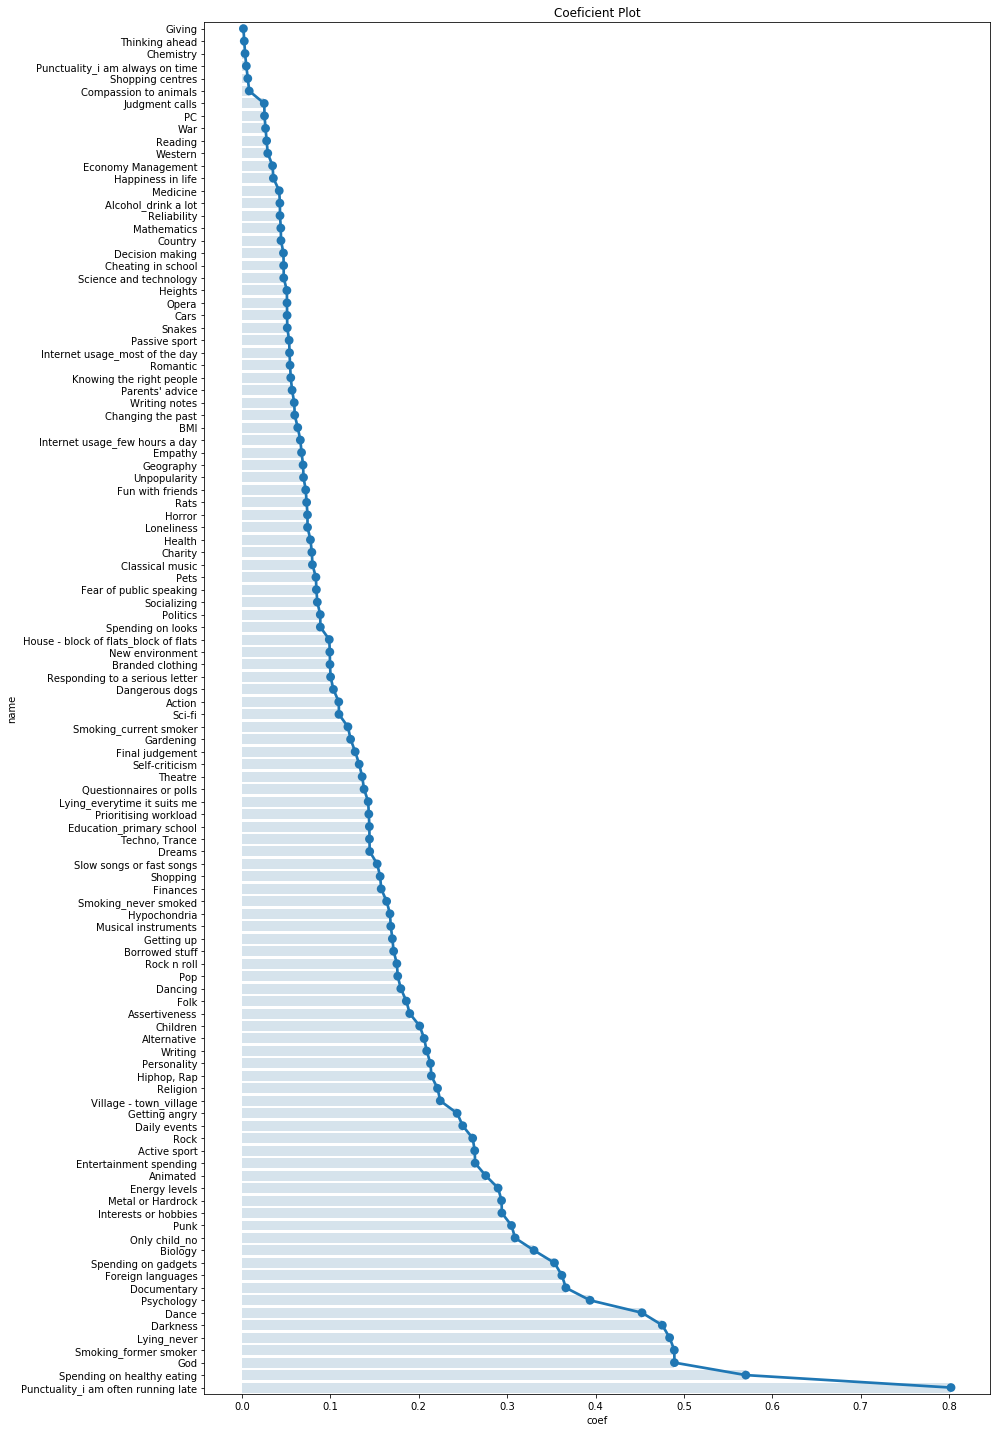

In [56]:
coef_plot(glm, X, abs_ = True)

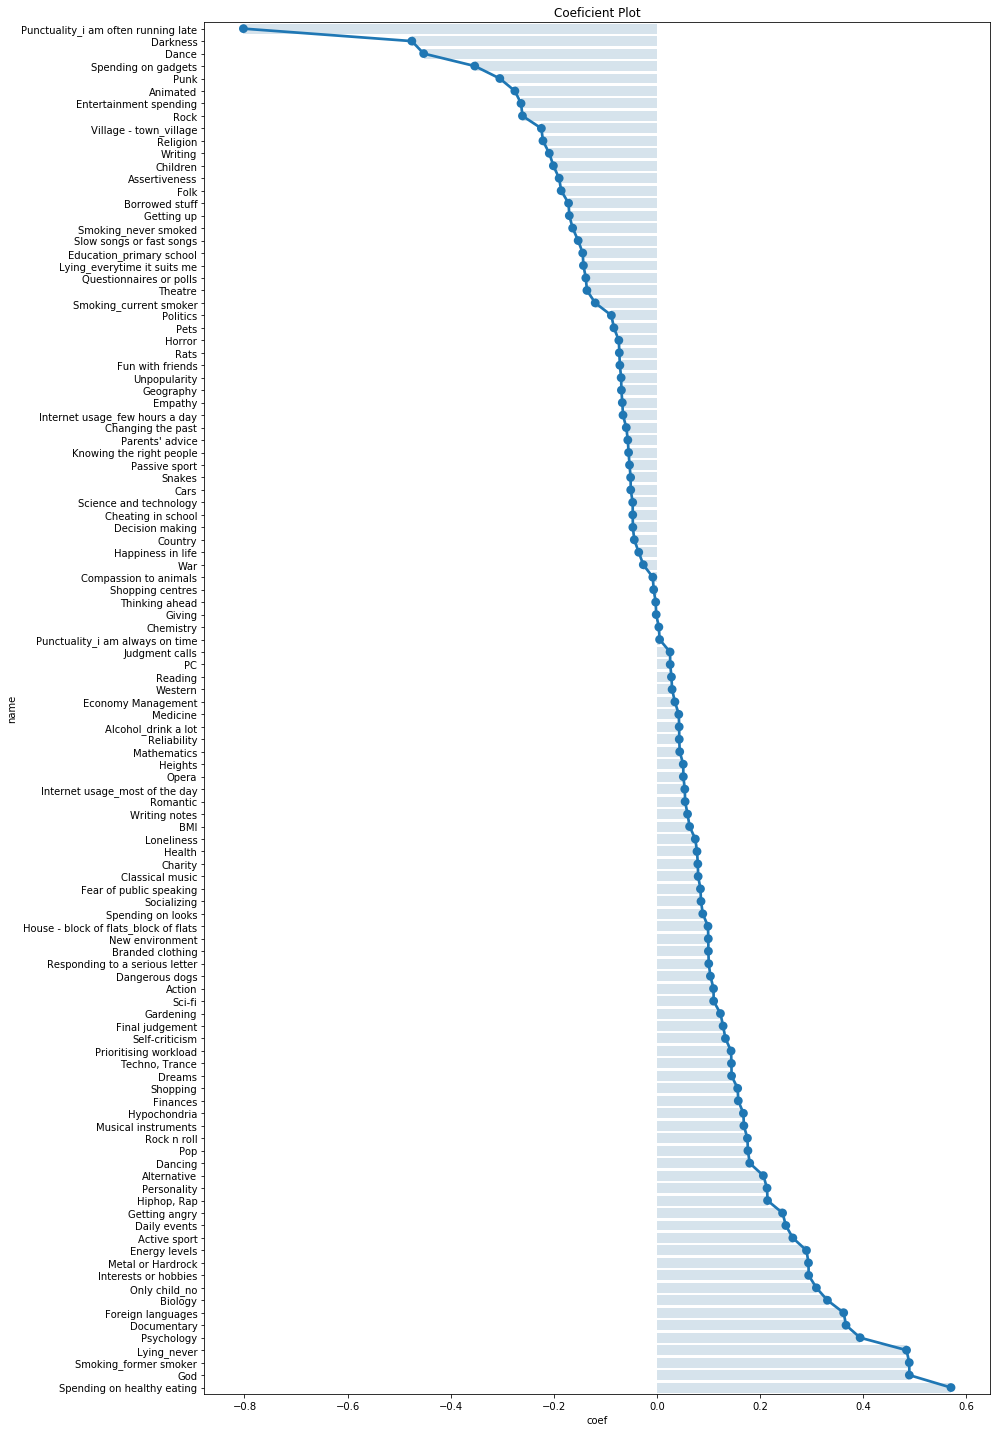

In [57]:
coef_plot(glm, X, abs_ = False)

The top factors that increase the likelihood good health are never smoking, having a strong beleif in god and spending more on healthy food.  The effect size of the belief in god suprises me quite a bit

Removing variables seems to hurt predictive performance.  This is good, and tells us that all of the variables in the dataset carry information about our outcome.  Since inputs are standardized, coeficients can be be intrpretted as variable importance. (source: https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models)


In [58]:
coefs = pd.DataFrame({'name': X.columns, 'coef' : glm.coef_[0]}).sort_values('coef')
top = coefs[coefs['coef'].abs() > 0]['name'].tolist()

In [59]:
X_train = X_train[top]
X_test = X_test[top]

pipe = Pipeline([('imp', SimpleImputer(strategy = 'most_frequent')),
                ('glm', LogisticRegressionCV(penalty ='l2', solver = 'liblinear'))
            ])
pipe.fit(X_train, y_train)


glm = pipe.named_steps['glm']
pipe.score(X_test, y_test)

0.7509881422924901

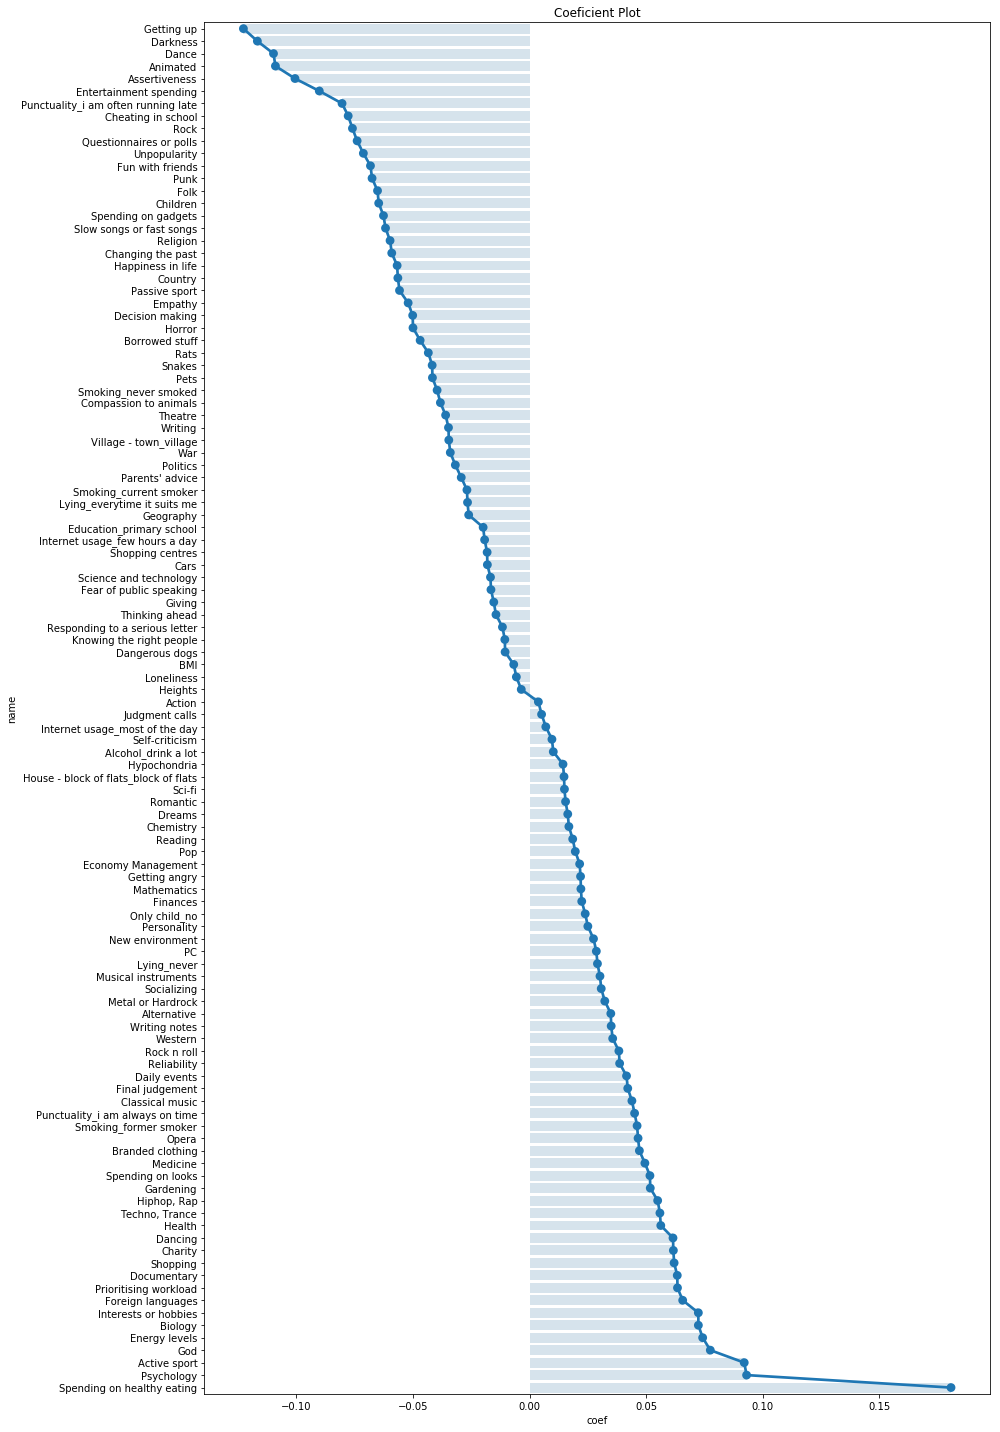

In [61]:
coef_plot(glm, X_train, abs_ = False)